In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
z3_bin_path = "./z3_bin/statistics/z3_test_1-40.csv"
z3_lbound_path = "./z3_lbound/statistics/z3_test_1-40.csv"
z3_rotation_path = "./z3_rotation_bin/statistics/z3_test_1-40.csv"
z3_rot_no_cum_path = "./z3_rotation_no_cumulative/statistics/z3_test_1-40.csv"

c4_bin_path = "./cvc4_bin/statistics/cvc4_test_1-40.csv"
c4_lbound_path = "./cvc4_lbound/statistics/cvc4_test_1-40.csv"
c4_rot_path = "./cvc4_rotation_bin/statistics/cvc4_test_1-40.csv"

In [50]:
def fill_data(names, times):
    full = np.full((40,), 300, dtype=np.float16)
    for n, t in zip(times, names):
        ind = int(n[4:])-1
        full[ind] = t
    return full
        
def get_times(data):
    if len(data['solve_time']) < 40:
        return fill_data(data['solve_time'], data['input_name'])
    return data['solve_time']

In [134]:
def plot_vertical_bar(data1, data2=None, width=0.4):
    instances = np.arange(1, 41)
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.bar(instances - width/2, data1, width=width, label='Times z3')
    if data2 is not None:
        ax.bar(instances + width/2, data2, width=width, label='Times c4')

    plt.xlabel("Instances")
    plt.ylabel("Times (s)")
    plt.yscale('log')
    plt.legend()
    plt.show()
    
    
def plot_lines(data1, data2=None):
    fig = plt.figure(figsize=(15, 5))

    plt.plot(data1, label="Times z3")
    if data2 is not None:
        plt.plot(data2, label="Times CVC4")

    plt.xlabel("Instances")
    plt.ylabel("Times (s)")
    plt.yscale('log')
    plt.legend()
    plt.show()

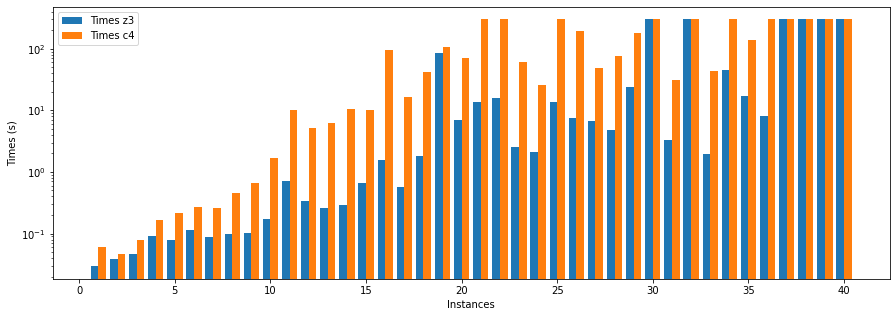

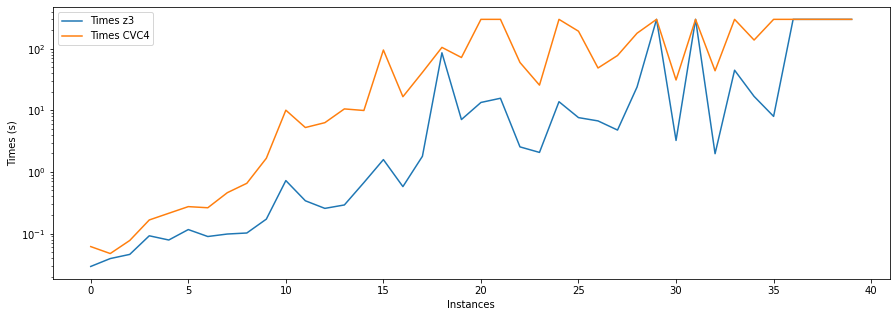

In [135]:
z3_bin_times = get_times(pd.read_csv(z3_bin_path))
c4_lbound_times = get_times(pd.read_csv(c4_bin_path))
plot_vertical_bar(z3_bin_times, c4_lbound_times, width=0.4)
plot_lines(z3_bin_times, c4_lbound_times)